X1	net profit / total assets <br>
X2	total liabilities / total assets <br>
X3	working capital / total assets <br>
X4	current assets / short-term liabilities <br>
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 <br>
X6	retained earnings / total assets <br>
X7	EBIT / total assets <br>
X8	book value of equity / total liabilities <br>
X9	sales / total assets <br>
X10	equity / total assets <br>
X11	(gross profit + extraordinary items + financial expenses) / total assets <br>
X12	gross profit / short-term liabilities <br>
X13	(gross profit + depreciation) / sales <br>
X14	(gross profit + interest) / total assets <br>
X15	(total liabilities * 365) / (gross profit + depreciation) <br>
X16	(gross profit + depreciation) / total liabilities <br>
X17	total assets / total liabilities <br>
X18	gross profit / total assets <br>
X19	gross profit / sales <br>
X20	(inventory * 365) / sales <br>
X21	sales (n) / sales (n-1) <br>
X22	profit on operating activities / total assets <br>
X23	net profit / sales <br>
X24	gross profit (in 3 years) / total assets <br>
X25	(equity - share capital) / total assets <br>
X26	(net profit + depreciation) / total liabilities <br>
X27	profit on operating activities / financial expenses <br>
X28	working capital / fixed assets <br>
X29	logarithm of total assets <br>
X30	(total liabilities - cash) / sales <br>
X31	(gross profit + interest) / sales<br> 
X32	(current liabilities * 365) / cost of products sold <br>
X33	operating expenses / short-term liabilities <br>
X34	operating expenses / total liabilities <br>
X35	profit on sales / total assets <br>
X36	total sales / total assets <br>
X37	(current assets - inventories) / long-term liabilities <br>
X38	constant capital / total assets <br>
X39	profit on sales / sales <br>
X40	(current assets - inventory - receivables) / short-term liabilities <br>
X41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) <br>
X42	profit on operating activities / sales <br>
X43	rotation receivables + inventory turnover in days <br>
X44	(receivables * 365) / sales <br>
X45	net profit / inventory <br>
X46	(current assets - inventory) / short-term liabilities <br>
X47	(inventory * 365) / cost of products sold <br>
X48	EBITDA (profit on operating activities - depreciation) / total assets <br>
X49	EBITDA (profit on operating activities - depreciation) / sales <br>
X50	current assets / total liabilities <br>
X51	short-term liabilities / total assets <br>
X52	(short-term liabilities * 365) / cost of products sold) <br>
X53	equity / fixed assets <br>
X54	constant capital / fixed assets <br>
X55	working capital <br>
X56	(sales - cost of products sold) / sales <br>
X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) <br>
X58	total costs /total sales <br>
X59	long-term liabilities / equity <br>
X60	sales / inventory <br>
X61	sales / receivables <br>
X62	(short-term liabilities *365) / sales <br>
X63	sales / short-term liabilities <br>
X64	sales / fixed assets<br>

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipline_imb
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.pipeline import FeatureUnion
from fancyimpute import  KNN
from sklearn.preprocessing import StandardScaler
import warnings
import impyute
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
%pylab inline
import warnings
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999

Populating the interactive namespace from numpy and matplotlib


In [387]:
df=pd.read_csv('csv_result-5year.csv',index_col=0)
df.replace('?',np.nan,inplace=True)
df=df.astype('float')

In [388]:
df.shape

(5910, 65)

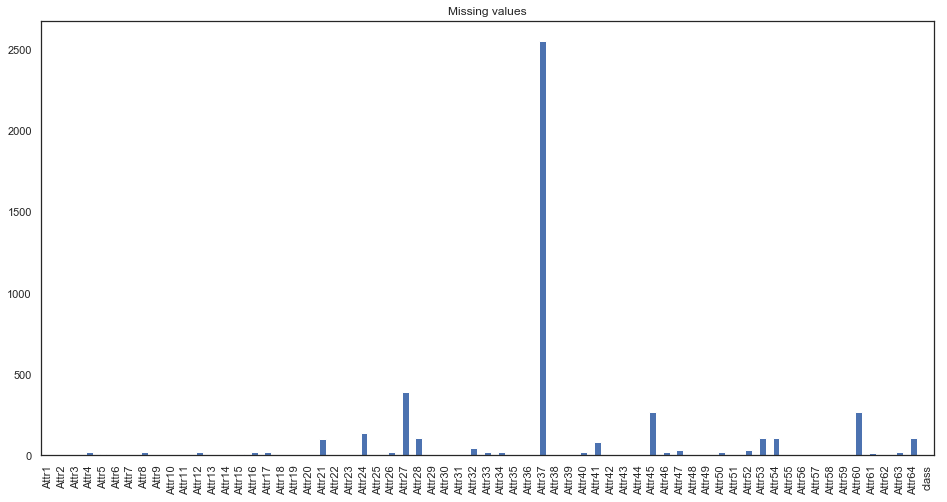

In [389]:
missing=df.isna().sum()
plt.figure(figsize=(16,8))
missing.plot.bar()
plt.title('Missing values')
plt.show()

# Create a machine learning algorithm to predict missing value

# Using KNN to estimate missing value

In [390]:
X=df.drop(['class'],axis=1)
y=df['class']

In [391]:
X_filled_knn = KNN(k=75).fit_transform(X)

Imputing row 1/5910 with 0 missing, elapsed time: 11.416
Imputing row 101/5910 with 1 missing, elapsed time: 11.424
Imputing row 201/5910 with 1 missing, elapsed time: 11.431
Imputing row 301/5910 with 0 missing, elapsed time: 11.435
Imputing row 401/5910 with 1 missing, elapsed time: 11.438
Imputing row 501/5910 with 0 missing, elapsed time: 11.442
Imputing row 601/5910 with 1 missing, elapsed time: 11.446
Imputing row 701/5910 with 1 missing, elapsed time: 11.449
Imputing row 801/5910 with 1 missing, elapsed time: 11.452
Imputing row 901/5910 with 0 missing, elapsed time: 11.458
Imputing row 1001/5910 with 3 missing, elapsed time: 11.461
Imputing row 1101/5910 with 0 missing, elapsed time: 11.465
Imputing row 1201/5910 with 1 missing, elapsed time: 11.469
Imputing row 1301/5910 with 1 missing, elapsed time: 11.472
Imputing row 1401/5910 with 1 missing, elapsed time: 11.476
Imputing row 1501/5910 with 0 missing, elapsed time: 11.479
Imputing row 1601/5910 with 0 missing, elapsed time:

In [392]:
#Normalization
scaler=StandardScaler()
X_filled_knn=scaler.fit_transform(X_filled_knn)

In [393]:
df_KNN=pd.DataFrame(X_filled_knn,columns=X.columns)

# Features selections 

In [394]:
corr=df_KNN.corr()

In [395]:
corr_matrix =corr.abs()

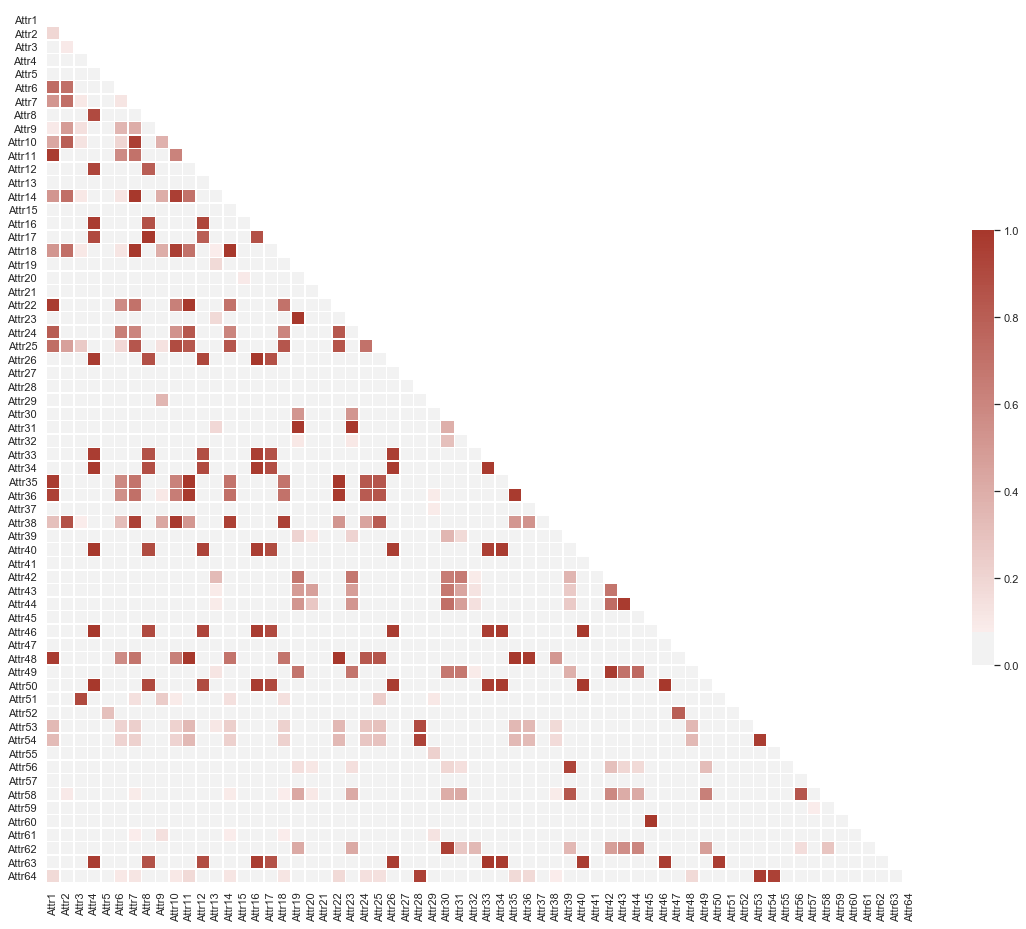

In [396]:
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 16))
cmap = sns.diverging_palette(250, 15, as_cmap=True,s=75, l=40,sep=20)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [397]:
#filter out features that are greater than threshold
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) #upper matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]  #drop correlation >0.8
df_important_features=df_KNN.drop(df_KNN[to_drop], axis=1)  # drop high correlated features

In [398]:
df_important_features.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr9',
       'Attr13', 'Attr15', 'Attr19', 'Attr20', 'Attr21', 'Attr27', 'Attr28',
       'Attr29', 'Attr30', 'Attr32', 'Attr37', 'Attr39', 'Attr41', 'Attr42',
       'Attr43', 'Attr45', 'Attr47', 'Attr52', 'Attr55', 'Attr57', 'Attr59',
       'Attr61'],
      dtype='object')

# Handling imbalance data

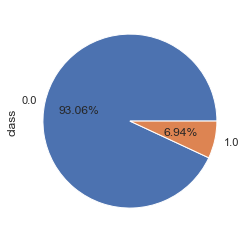

In [469]:
#imbalanced classification
(df['class']).value_counts().plot(kind ='pie', autopct='%1.2f%%')
plt.show();

# Stratified CV and SMOTE and Data Modeling

In [399]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2019)
pipe1=make_pipline_imb(SMOTE(random_state=2019),LogisticRegression(solver='lbfgs',random_state=2019)) 
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)

In [400]:
#prepare a df to metrics
metrics=pd.DataFrame(index=['accuracy','precision','recall','f1 score'],
                     columns=['LogisticReg','DecisionTree','SVM','RandomForest','AdaBoost','XGBoosting'])

In [401]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN
f1 score,NaN,NaN,NaN,NaN,NaN,NaN


############################################################
[[873 227]
 [ 25  57]]
accuracy score 0.7868020304568528
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      1100
         1.0       0.20      0.70      0.31        82

    accuracy                           0.79      1182
   macro avg       0.59      0.74      0.59      1182
weighted avg       0.92      0.79      0.83      1182

############################################################
############################################################
############################################################
[[873 227]
 [ 28  54]]
accuracy score 0.7842639593908629
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      1100
         1.0       0.19      0.66      0.30        82

    accuracy                           0.78      1182
   macro avg       0.58      0.73      0.59      1182
weighted avg       0.92      0.78      0.83

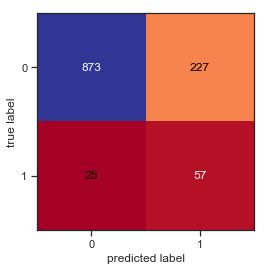

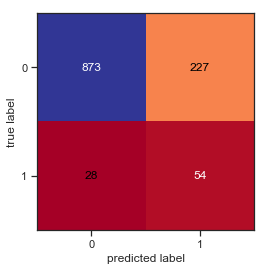

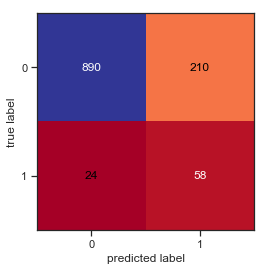

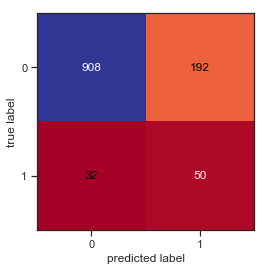

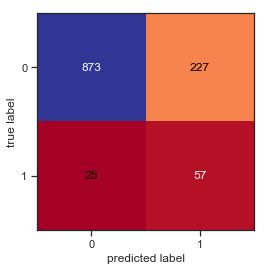

In [402]:
#with SMOTE

#skf.get_n_splits(X,y)
accuracy_smote=[]
precision_smote=[]
recall_smote=[]
f1_smote=[]
auc_smote=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe1.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy_smote.append(pipe1.score(X_test,y_test))
    precision_smote.append(precision_score(y_test,prediction))
    recall_smote.append(recall_score(y_test,prediction))
    f1_smote.append(f1_score(y_test,prediction))
    #auc_smote.append(roc_auc_score(y_test,prediction))
print()
print("Logistic Regression")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_smote)))
print("Precision: {}".format(np.mean(precision_smote)))
print("Recall: {}".format(np.mean(recall_smote)))
print("f1: {}".format(np.mean(f1_smote)))
metrics.loc['accuracy','LogisticReg']=np.mean(accuracy_smote)
metrics.loc['precision','LogisticReg']=np.mean(precision_smote)
metrics.loc['recall','LogisticReg']=np.mean(recall_smote)
metrics.loc['f1 score','LogisticReg']=np.mean(f1_smote)

In [403]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.794078,NaN,NaN,NaN,NaN,NaN
precision,0.203322,NaN,NaN,NaN,NaN,NaN
recall,0.673171,NaN,NaN,NaN,NaN,NaN
f1 score,0.312108,NaN,NaN,NaN,NaN,NaN


############################################################
[[1096    4]
 [  74    8]]
accuracy score 0.934010152284264
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1100
         1.0       0.67      0.10      0.17        82

    accuracy                           0.93      1182
   macro avg       0.80      0.55      0.57      1182
weighted avg       0.92      0.93      0.91      1182

############################################################
############################################################
############################################################
[[1095    5]
 [  75    7]]
accuracy score 0.9323181049069373
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.96      1100
         1.0       0.58      0.09      0.15        82

    accuracy                           0.93      1182
   macro avg       0.76      0.54      0.56      1182
weighted avg       0.91      0.93   

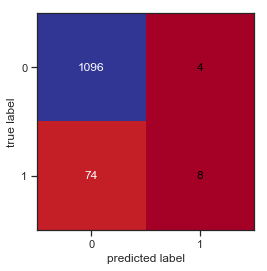

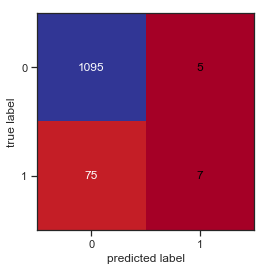

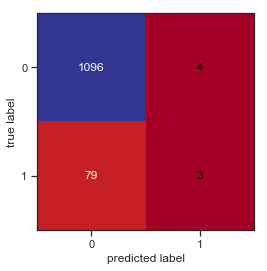

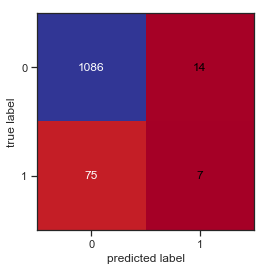

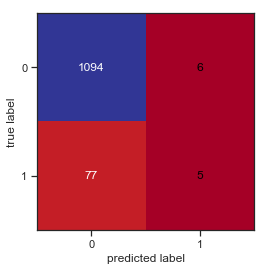

In [404]:
#without SMOTE
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2019)
accuracy=[]
precision=[]
recall=[]
f1=[]
auc=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    logreg=LogisticRegression(random_state=2019,solver='lbfgs')
    logreg.fit(X_train,y_train.ravel())
    prediction=logreg.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy.append(logreg.score(X_test,y_test))
    precision.append(precision_score(y_test,prediction))
    recall.append(recall_score(y_test,prediction))
    f1.append(f1_score(y_test,prediction))
    #auc.append(roc_auc_score(y_test,prediction))
print()
print("Logistic Regression")
print("Stratified Kfold score without SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy)))
print("Precision: {}".format(np.mean(precision)))
print("Recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print()

Because the data is imbalanced, we observed poor recall score even though the accuracy is high. <br>
As most of classification is 0, we have many False Negative label in confusion matrix, leading to poor recall score. <br>
In contrast, we have better recall score using SMOTE (over-sampling) to re-balance the classification. <br>
We also  would like to emphasis on "Recall" and "Precision" <br> 
Recall is an important score in predicting potential bankcrupcy companies . <br>  This is because people want to know how many bankcrupcy companies the model can identify given that <br>the bankcrupcy companies are known.<br>
Precision: Given that model predict 10 firms, how many are actual bankcrupt companies.<br>
In other words, low Precision score can make investors to miss opportunity investing in good companies <br>
We want to find the balance between Precision and Recall, so F1 score is a measurement for model evaluation


############################################################
[[928 172]
 [ 26  56]]
accuracy score 0.8324873096446701
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      1100
         1.0       0.25      0.68      0.36        82

    accuracy                           0.83      1182
   macro avg       0.61      0.76      0.63      1182
weighted avg       0.92      0.83      0.87      1182

############################################################
############################################################
############################################################
[[896 204]
 [ 22  60]]
accuracy score 0.8087986463620981
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      1100
         1.0       0.23      0.73      0.35        82

    accuracy                           0.81      1182
   macro avg       0.60      0.77      0.62      1182
weighted avg       0.92      0.81      0.85

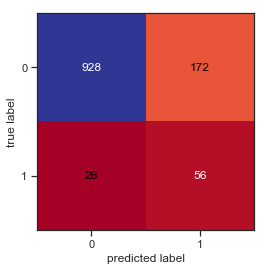

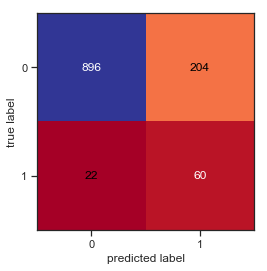

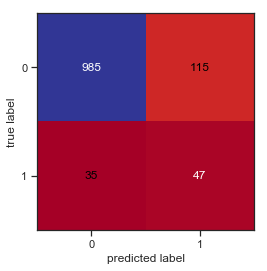

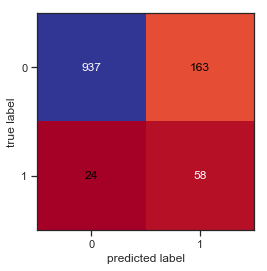

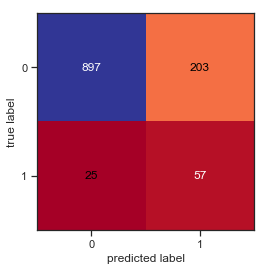

In [405]:

#SMOTE with Decision Tree
pipe2=make_pipline_imb(SMOTE(random_state=2019),DecisionTreeClassifier(random_state=2019,max_depth=7))

accuracy_DT=[]
precision_DT=[]
recall_DT=[]
f1_DT=[]
auc_DT=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    #model=pipe2.fit(X_train,y_train.ravel())
    sm = SMOTE(random_state=2019)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    model=DecisionTreeClassifier(random_state=2019,max_depth=7)
    model.fit(X_res,y_res)
    prediction=model.predict(X_test)
    
    accuracy_DT.append(model.score(X_test,y_test))
    precision_DT.append(precision_score(y_test,prediction))
    recall_DT.append(recall_score(y_test,prediction))
    f1_DT.append(f1_score(y_test,prediction))
    auc_DT.append(roc_auc_score(y_test,prediction))
    
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    #try to plot decision tree
    features = list(df_important_features.columns)
    tree.export_graphviz(model,out_file='tree.dot')
    dot_data = StringIO() 
    tree.export_graphviz(model, out_file=dot_data)
    export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    #graph.write_pdf("tree.pdf")
    Image(graph[0].create_png()) 
    
print()
print("Decision Tree")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_DT)))
print("Precision: {}".format(np.mean(precision_DT)))
print("Recall: {}".format(np.mean(recall_DT)))
print("f1: {}".format(np.mean(f1_DT)))
metrics.loc['accuracy','DecisionTree']=np.mean(accuracy_DT)
metrics.loc['precision','DecisionTree']=np.mean(precision_DT)
metrics.loc['recall','DecisionTree']=np.mean(recall_DT)
metrics.loc['f1 score','DecisionTree']=np.mean(f1_DT)

In [406]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.794078,0.832657,NaN,NaN,NaN,NaN
precision,0.203322,0.248937,NaN,NaN,NaN,NaN
recall,0.673171,0.678049,NaN,NaN,NaN,NaN
f1 score,0.312108,0.361906,NaN,NaN,NaN,NaN


In [407]:
#SVM
from sklearn.svm import SVC

############################################################
[[893 207]
 [ 25  57]]
accuracy score 0.8037225042301185
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.89      1100
         1.0       0.22      0.70      0.33        82

    accuracy                           0.80      1182
   macro avg       0.59      0.75      0.61      1182
weighted avg       0.92      0.80      0.85      1182

############################################################
############################################################
############################################################
[[906 194]
 [ 36  46]]
accuracy score 0.805414551607445
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      1100
         1.0       0.19      0.56      0.29        82

    accuracy                           0.81      1182
   macro avg       0.58      0.69      0.59      1182
weighted avg       0.91      0.81      0.85 

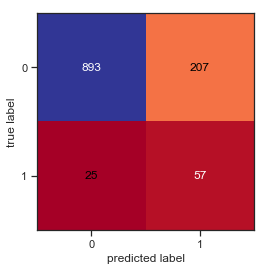

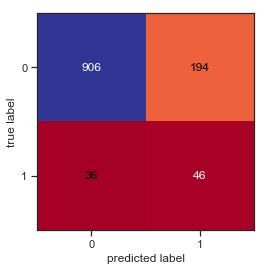

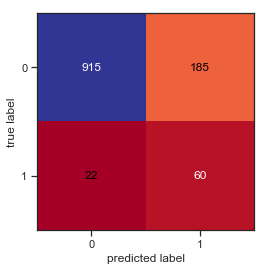

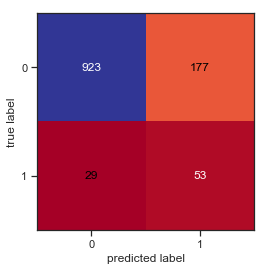

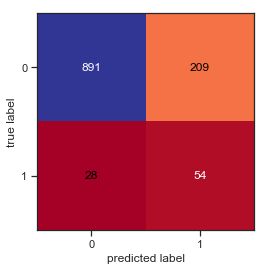

In [408]:
pipe4=make_pipline_imb(SMOTE(),SVC(random_state=2019,C=1))

accuracy_SVC=[]
precision_SVC=[]
recall_SVC=[]
f1_SVC=[]
auc_SVC=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe4.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy_SVC.append(pipe4.score(X_test,y_test))
    precision_SVC.append(precision_score(y_test,prediction))
    recall_SVC.append(recall_score(y_test,prediction))
    f1_SVC.append(f1_score(y_test,prediction))
    #auc_NB.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Support Vector Machine")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_SVC)))
print("Precision: {}".format(np.mean(precision_SVC)))
print("Recall: {}".format(np.mean(recall_SVC)))
print("f1: {}".format(np.mean(f1_SVC)))
metrics.loc['accuracy','SVM']=np.mean(accuracy_SVC)
metrics.loc['precision','SVM']=np.mean(precision_SVC)
metrics.loc['recall','SVM']=np.mean(recall_SVC)
metrics.loc['f1 score','SVM']=np.mean(f1_SVC)

In [409]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.794078,0.832657,0.811844,NaN,NaN,NaN
precision,0.203322,0.248937,0.217646,NaN,NaN,NaN
recall,0.673171,0.678049,0.658537,NaN,NaN,NaN
f1 score,0.312108,0.361906,0.326991,NaN,NaN,NaN


# Ensemble 

# RandomForest Classifier

In [410]:
from sklearn.ensemble import RandomForestClassifier

In [411]:
RF = RandomForestClassifier(random_state=2019)

In [412]:
pipe5=make_pipline_imb(SMOTE(),RF)

############################################################
[[1040   60]
 [  40   42]]
accuracy score 0.9153976311336718
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1100
         1.0       0.41      0.51      0.46        82

    accuracy                           0.92      1182
   macro avg       0.69      0.73      0.71      1182
weighted avg       0.92      0.92      0.92      1182

############################################################
############################################################
############################################################
[[1043   57]
 [  39   43]]
accuracy score 0.9187817258883249
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1100
         1.0       0.43      0.52      0.47        82

    accuracy                           0.92      1182
   macro avg       0.70      0.74      0.71      1182
weighted avg       0.93      0.92  

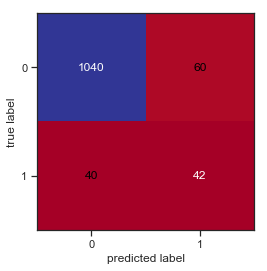

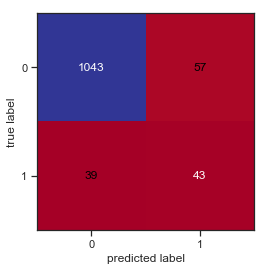

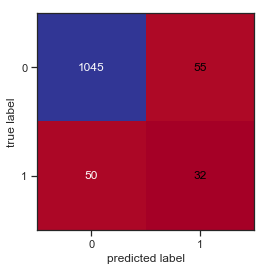

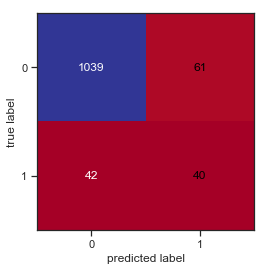

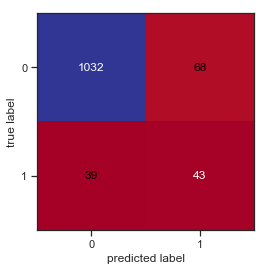

In [413]:
accuracy_RF=[]
precision_RF=[]
recall_RF=[]
f1_RF=[]
auc_RF=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe5.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    accuracy_RF.append(pipe5.score(X_test,y_test))
    precision_RF.append(precision_score(y_test,prediction))
    recall_RF.append(recall_score(y_test,prediction))
    f1_RF.append(f1_score(y_test,prediction))
    #auc_NB.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Voting Classifier")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_RF)))
print("Precision: {}".format(np.mean(precision_RF)))
print("Recall: {}".format(np.mean(recall_RF)))
print("f1: {}".format(np.mean(f1_RF)))
metrics.loc['accuracy','RandomForest']=np.mean(accuracy_RF)
metrics.loc['precision','RandomForest']=np.mean(precision_RF)
metrics.loc['recall','RandomForest']=np.mean(recall_RF)
metrics.loc['f1 score','RandomForest']=np.mean(f1_RF)

In [414]:
metrics

,LogisticReg,DecisionTree,SVM,RandomForest,AdaBoost,XGBoosting
accuracy,0.794078,0.832657,0.811844,0.913536,NaN,NaN
precision,0.203322,0.248937,0.217646,0.398602,NaN,NaN
recall,0.673171,0.678049,0.658537,0.487805,NaN,NaN
f1 score,0.312108,0.361906,0.326991,0.4381,NaN,NaN


# AdaBoost

In [415]:
from sklearn.ensemble import AdaBoostClassifier

In [416]:
pipe_AdaBoost=make_pipline_imb(SMOTE(),AdaBoostClassifier(n_estimators=50))

############################################################
[[936 164]
 [ 22  60]]
accuracy score 0.8426395939086294
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      1100
         1.0       0.27      0.73      0.39        82

    accuracy                           0.84      1182
   macro avg       0.62      0.79      0.65      1182
weighted avg       0.93      0.84      0.87      1182

############################################################
############################################################
############################################################
[[974 126]
 [ 25  57]]
accuracy score 0.8722504230118443
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1100
         1.0       0.31      0.70      0.43        82

    accuracy                           0.87      1182
   macro avg       0.64      0.79      0.68      1182
weighted avg       0.93      0.87      0.89

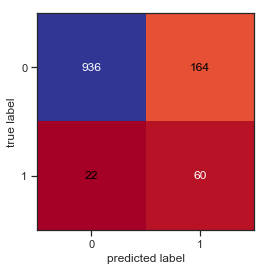

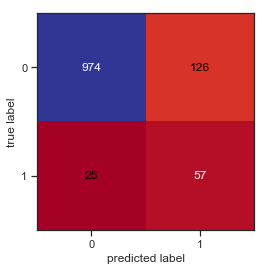

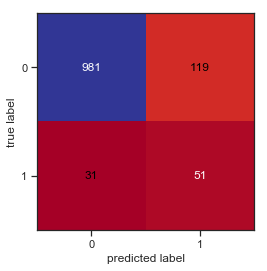

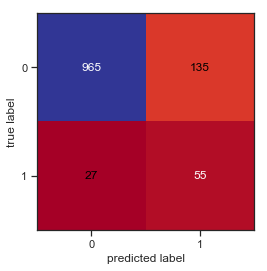

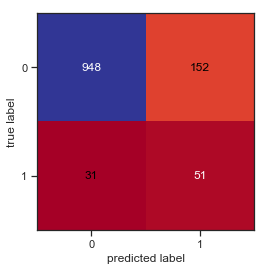

In [417]:
accuracy_AdaBoost=[]
precision_AdaBoost=[]
recall_AdaBoost=[]
f1_AdaBoost=[]
auc_AdaBoost=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    model=pipe_AdaBoost.fit(X_train,y_train.ravel())
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    accuracy_AdaBoost.append(pipe_AdaBoost.score(X_test,y_test))
    precision_AdaBoost.append(precision_score(y_test,prediction))
    recall_AdaBoost.append(recall_score(y_test,prediction))
    f1_AdaBoost.append(f1_score(y_test,prediction))
    #auc_AdaBoost.append(roc_auc_score(y_test,prediction))
    
    
print()
print("Voting Classifier")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_xgb)))
print("Precision: {}".format(np.mean(precision_xgb)))
print("Recall: {}".format(np.mean(recall_xgb)))
print("f1: {}".format(np.mean(f1_xgb)))
metrics.loc['accuracy','AdaBoost']=np.mean(accuracy_AdaBoost)
metrics.loc['precision','AdaBoost']=np.mean(precision_AdaBoost)
metrics.loc['recall','AdaBoost']=np.mean(recall_AdaBoost)
metrics.loc['f1 score','AdaBoost']=np.mean(f1_AdaBoost)

# XGBoost (Extreme Gradient Boosting)

In [419]:
#XGBoost can handle missing values ???

In [420]:
from xgboost import XGBClassifier
from xgboost import plot_tree

In [421]:
xgb = XGBClassifier(max_depth=3)

In [422]:
pipe_xgb=make_pipline_imb(SMOTE(),xgb)

############################################################
[[977 123]
 [ 24  58]]
accuracy score 0.8756345177664975
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1100
         1.0       0.32      0.71      0.44        82

    accuracy                           0.88      1182
   macro avg       0.65      0.80      0.69      1182
weighted avg       0.93      0.88      0.90      1182

############################################################
############################################################
############################################################
[[1001   99]
 [  26   56]]
accuracy score 0.8942470389170897
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1100
         1.0       0.36      0.68      0.47        82

    accuracy                           0.89      1182
   macro avg       0.67      0.80      0.71      1182
weighted avg       0.93      0.89      

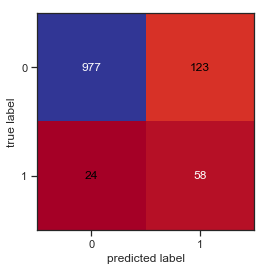

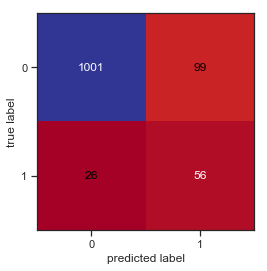

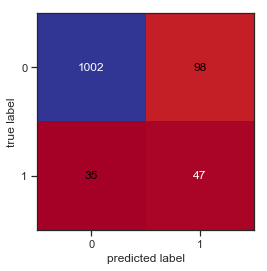

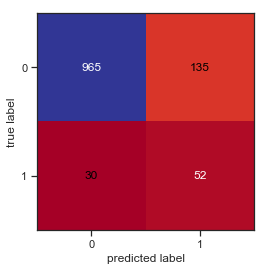

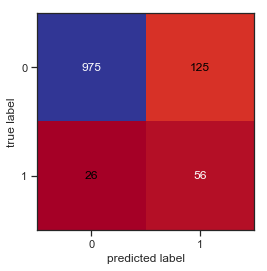

In [492]:
accuracy_xgb=[]
precision_xgb=[]
recall_xgb=[]
f1_xgb=[]
auc_xgb=[]
for train_index,test_index in skf.split(df_important_features,y):
    X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
    y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
    y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
    
    sm = SMOTE(random_state=2019)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    model=xgb
    model.fit(X_res,y_res)
    prediction=model.predict(X_test)
    
    conf_matrix=confusion_matrix(y_test,prediction)
    print("#"*60)
    print(conf_matrix)
    print('accuracy score',accuracy_score(y_test,prediction))
    print(classification_report(y_test, prediction))
    print("#"*60)
    plot_confusion_matrix(confusion_matrix(y_test, prediction),cmap='RdYlBu')
    print("#"*60)
    
    #fig, ax = plt.subplots(figsize=(30, 30))
    #plot_tree(model, num_trees=3, ax=ax)
    #plt.show()
    
    accuracy_xgb.append(pipe_xgb.score(X_test,y_test))
    precision_xgb.append(precision_score(y_test,prediction))
    recall_xgb.append(recall_score(y_test,prediction))
    f1_xgb.append(f1_score(y_test,prediction))
    #auc_xgb.append(roc_auc_score(y_test,prediction))
    
    
print()
print("XGBoosting")
print("Stratified Kfold score with SMOTE: \n")
print("Accuracy: {}".format(np.mean(accuracy_xgb)))
print("Precision: {}".format(np.mean(precision_xgb)))
print("Recall: {}".format(np.mean(recall_xgb)))
print("f1: {}".format(np.mean(f1_xgb)))
metrics.loc['accuracy','XGBoosting']=np.mean(accuracy_xgb)
metrics.loc['precision','XGBoosting']=np.mean(precision_xgb)
metrics.loc['recall','XGBoosting']=np.mean(recall_xgb)
metrics.loc['f1 score','XGBoosting']=np.mean(f1_xgb)

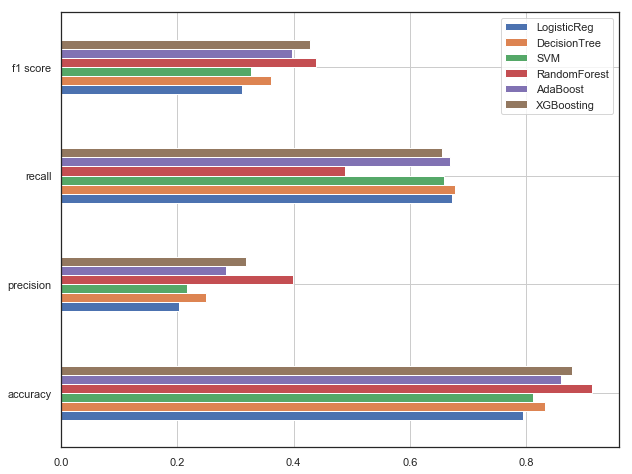

In [424]:
fig,ax=plt.subplots(figsize=(10,8))
metrics.plot(kind='barh',ax=ax)
ax.grid()

# Tuning using GridSearchCV

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [430]:
X=df_important_features
y=df['class']

# Logistic Regression Tuning

In [338]:
LogReg_model = Pipeline([('smt',SMOTE(random_state=2019)),
        
                ('classifier', LogisticRegression(random_state=2019))
                 ])


LogReg_param_grid = [{'classifier__C':[ 0.001, 0.01, 0.1,1,10],
                'classifier__class_weight':[{0:0.01, 1:0.99}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}]}]

LogReg_grid = GridSearchCV(estimator=LogReg_model,param_grid=LogReg_param_grid,cv=5,scoring='f1')


In [339]:
LogReg_GSC=LogReg_grid.fit(X=X,y=y)

In [340]:
LogReg_GSC.best_score_

0.30490210024784165

In [341]:
LogReg_GSC.best_params_

{'classifier__C': 10, 'classifier__class_weight': {0: 0.8, 1: 0.2}}

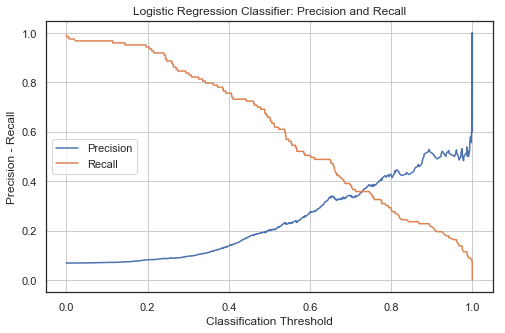

In [707]:
#try to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3,shuffle=True,random_state=123)

LogReg_model.fit(X_train,y_train)
LogReg_prediction=LogReg_model.predict(X_test)
precision_LR, recall_LR,thresholds_LR=precision_recall_curve(y_test,probas_pred=LogReg_model.predict_proba(X_test)[:,1],pos_label=1)

fig,ax=plt.subplots(figsize=(8,5))
ax.plot(thresholds_LR,precision_LR[1:],label='Precision')
ax.plot(thresholds_LR,recall_LR[1:],label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision - Recall')
ax.set_title('Logistic Regression Classifier: Precision and Recall')
ax.legend()
ax.grid()

Above: Logistic Regression Precison-Recall Trade-Off by adjusting Threshold (Default threshold is 0.5)

# Decision Tree Tuning

In [343]:
DT_model = Pipeline([('smt',SMOTE(random_state=2019)),
        
                ('classifier', DecisionTreeClassifier(random_state=2019))
                 ])


DT_param_grid = [{'classifier__max_depth':np.arange(5,25,1),
                'classifier__class_weight':[{0:0.01, 1:0.99}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}]}]

DT_grid = GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=5,scoring='f1')
DT_GSC=DT_grid.fit(X=X,y=y)

In [344]:
DT_GSC.best_score_

0.4079891095258102

In [345]:
DT_GSC.best_params_

{'classifier__class_weight': {0: 0.8, 1: 0.2}, 'classifier__max_depth': 4}

# SVM Tuning

In [ ]:
SVM_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',SVC(random_state=2019,probability=True))               
                   ])

SVM_param_grid=[{'classifier__C':[ 0.001, 0.01, 0.1,1,10],
                'classifier__class_weight':[{0:0.01, 1:0.99}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}]}]

SVM_grid=GridSearchCV(estimator=SVM_model,param_grid=SVM_param_grid,cv=5,scoring='f1')
SVM_GSC=SVM_grid.fit(X,y)

In [ ]:
SVM_GSC.best_score_

In [ ]:
SVM_GSC.best_params_

In [ ]:
SVM_GSC.best_index_

# Random Forest Tuning

In [432]:
RF_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',RandomForestClassifier(random_state=2019))               
                   ])
RF_param_grid=[{'classifier__n_estimators':[10,20,30,40,50],
               'classifier__class_weight':[{0:0.3, 1:0.7}, {0:0.80, 1:0.20},{0:0.20, 1:0.80},{0:1, 1:20}],
               'classifier__max_depth':np.arange(5,15,1)
               }]
RF_grid=GridSearchCV(estimator=RF_model,param_grid=RF_param_grid,cv=5,scoring='f1')
RF_GSC=RF_grid.fit(X,y)

In [433]:
RF_GSC.best_score_

0.4665968447054805

In [434]:
RF_GSC.best_params_

{'classifier__class_weight': {0: 0.8, 1: 0.2},
 'classifier__max_depth': 7,
 'classifier__n_estimators': 50}

In [438]:
RF_GSC.best_index_

64

# AdaBoost Tuning

In [445]:
AdaBoost_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',AdaBoostClassifier(random_state=2019))               
                   ])
AdaBoost_param_grid=[{'classifier__n_estimators':[10,20,30,40,50] }]
AdaBoost_grid=GridSearchCV(estimator=AdaBoost_model,param_grid=AdaBoost_param_grid,cv=5,scoring='f1')
AdaBoost_GSC=AdaBoost_grid.fit(X,y)

In [446]:
AdaBoost_GSC.best_score_

0.3731328778322603

In [447]:
AdaBoost_GSC.best_params_

{'classifier__n_estimators': 50}

# XGBoosting Tuning

In [458]:
xgb_model=Pipeline([('smt',SMOTE(random_state=2019)),
                    ('classifier',XGBClassifier(random_state=2019))
                   ])
xgb_param_grid=[{'classifier__max_depth':np.arange(5,15,1),
               'classifier__n_estimators':[10,20,30,40,50,70,100], 
               }]
xgb_grid=GridSearchCV(estimator=xgb_model,param_grid=xgb_param_grid,cv=5,scoring='f1')

xgb_GSC=xgb_grid.fit(X.as_matrix(),y.as_matrix())

In [459]:
xgb_GSC.best_score_

0.47274231766778424

In [460]:
xgb_GSC.best_params_

{'classifier__max_depth': 10, 'classifier__n_estimators': 100}

# Combine all models together

In [490]:
models=[LogisticRegression(C=10,class_weight={0: 0.8, 1: 0.2}),
        DecisionTreeClassifier(max_depth=4,class_weight={0: 0.8, 1: 0.2}),
        SVC(C=10,class_weight={0: 0.8, 1: 0.2}),
        RandomForestClassifier(class_weight={0: 0.8, 1: 0.2},max_depth=7,n_estimators=50),
        AdaBoostClassifier(n_estimators=50),
        XGBClassifier(max_depth=10,n_estimators=100)]
model_name=['Logistic Regression','Decision Tree','Support Vector Machine','Random Forest','Adaptive Boost','XGB']
new_metrics=pd.DataFrame(index=['accuracy','precision','recall','f1 score'],
                     columns=['Logistic Regression','Decision Tree','Support Vector Machine','Random Forest','Adaptive Boost','XGB'])

Logistic Regression  accuracy :  0.9272419627749576
Logistic Regression  precision :  0.46104562104562097
Logistic Regression  recall :  0.24634146341463414
Logistic Regression  F1 :  0.32011384999376524
############################################################
Decision Tree  accuracy :  0.9199661590524535
Decision Tree  precision :  0.43471438058575895
Decision Tree  recall :  0.4390243902439024
Decision Tree  F1 :  0.43331434878370895
############################################################
Support Vector Machine  accuracy :  0.9262267343485618
Support Vector Machine  precision :  0.4500891652207442
Support Vector Machine  recall :  0.24634146341463414
Support Vector Machine  F1 :  0.31751959803957874
############################################################
Random Forest  accuracy :  0.9230118443316412
Random Forest  precision :  0.448998082376835
Random Forest  recall :  0.4585365853658536
Random Forest  F1 :  0.45276267527390557
##########################################

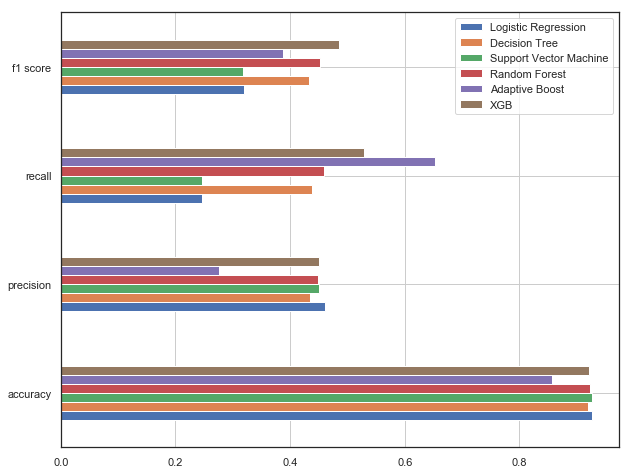

In [491]:
for name,model in zip(model_name,models):
    pipe=make_pipline_imb(SMOTE(random_state=2019),model)
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    auc=[]
    for train_index,test_index in skf.split(df_important_features,y):
        X_train,X_test=df_important_features.iloc[train_index].values,df_important_features.iloc[test_index].values
        y_train,y_test=y.iloc[train_index].values,y.iloc[test_index].values
        y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
        
        predictor=pipe.fit(X_train,y_train.ravel())
        prediction=predictor.predict(X_test)
        
        accuracy.append(pipe.score(X_test,y_test))
        precision.append(precision_score(y_test,prediction))
        recall.append(recall_score(y_test,prediction))
        f1.append(f1_score(y_test,prediction))
        
    print(name,' accuracy : ',np.mean(accuracy))
    print(name,' precision : ',np.mean(precision))
    print(name,' recall : ', np.mean(recall))
    print(name,' F1 : ',np.mean(f1))
    print('#'*60)
    
    new_metrics.loc['accuracy',name]=np.mean(accuracy)
    new_metrics.loc['precision',name]=np.mean(precision)
    new_metrics.loc['recall',name]=np.mean(recall)
    new_metrics.loc['f1 score',name]=np.mean(f1)
    
fig,ax=plt.subplots(figsize=(10,8))
new_metrics.plot(kind='barh',ax=ax)
ax.grid()

In [ ]:
#ROC CUrve to compare model
from sklearn.metrics import roc_curve

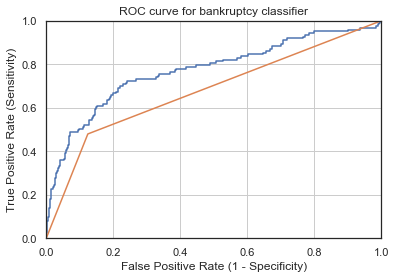

In [720]:
LogReg_model.fit(X_train,y_train)
y_pred_prob_LR=LogReg_model.predict_proba(X_test)[:,1]

DT_model.fit(X_train,y_train)
y_pred_prob_DT=DT_model.predict_proba(X_test)[:,1]

SVM_model.fit(X_train,y_train)
#y_pred_prob_SVM=SVM_model.predict_proba(X_test)[:,1]

fpr_LR, tpr_LR,_ = roc_curve(y_test, y_pred_prob_LR)
fpr_DT, tpr_DT,_ = roc_curve(y_test, y_pred_prob_DT)


plt.plot(fpr_LR, tpr_LR)
plt.plot(fpr_DT, tpr_DT)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for bankruptcy classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [722]:
y_pred_prob_SVM=SVM_model.predict_proba(X_test)

AttributeError: predict_proba is not available when  probability=False

In [711]:
LogReg_model.predict_proba(X_test)

array([[0.75076032, 0.24923968],
       [0.42573223, 0.57426777],
       [0.65668633, 0.34331367],
       ...,
       [0.84354152, 0.15645848],
       [0.86628765, 0.13371235],
       [0.61211559, 0.38788441]])

In [501]:
X_train

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr9,Attr13,Attr15,...,Attr41,Attr42,Attr43,Attr45,Attr47,Attr52,Attr55,Attr57,Attr59,Attr61
3561,0.007863,-0.017880,0.179032,-0.027887,-0.004535,-0.001969,0.015241,-0.399435,-0.005494,-2.263277e-03,...,-0.025514,0.006209,0.121032,-0.013488,0.044349,-0.023036,-0.096294,0.016334,-0.046103,-0.122224
749,0.010569,0.015345,-0.049157,-0.038249,-0.001361,0.007650,0.018306,-0.360172,-0.009653,7.656302e-03,...,-0.024682,0.023825,-0.101621,-0.013448,-0.031831,-0.044460,-0.007470,0.019369,0.050402,-0.051091
4480,0.010601,-0.024508,-0.017108,-0.037270,-0.001448,0.020039,0.018310,-0.354876,-0.009343,4.814179e-04,...,-0.025366,0.021661,-0.064156,-0.013457,-0.028351,-0.042253,0.160597,0.017609,-0.047806,-0.118968
2650,0.029875,-0.061789,0.086698,-0.008030,0.007310,-0.001969,0.034383,-0.540554,-0.001958,-6.547985e-03,...,-0.026249,0.109469,0.010854,-0.012106,-0.038141,-0.045540,-0.072922,0.024030,-0.047806,-0.209618
5717,0.144322,0.176287,-0.727273,-0.047939,-0.003745,-0.158117,0.108125,2.197449,-0.005856,-3.146316e-03,...,-0.025973,0.107516,-0.160515,-0.012947,-0.036777,-0.038970,-0.137906,-0.083861,-0.047806,1.251599
4413,0.003974,-0.015239,0.014584,-0.034473,-0.024661,0.003988,0.020540,-0.660513,-0.004671,9.766087e-04,...,-0.025211,0.060970,0.108228,-0.013498,0.026259,-0.006974,0.238252,0.014294,-0.017107,-0.154909
4616,0.008245,0.007431,-0.105287,-0.041299,-0.004739,-0.001969,0.014906,-0.503538,-0.009235,1.762855e-02,...,-0.023895,0.029181,0.076818,-0.013466,-0.009173,0.000135,-0.135954,0.017197,-0.018390,-0.203813
3339,0.017737,0.014895,0.053180,-0.037962,-0.000487,-0.001969,0.026556,1.343531,-0.009763,6.619580e-05,...,-0.025187,0.018346,-0.127963,-0.013365,-0.038717,-0.046174,-0.128991,0.024543,-0.047806,-0.057386
2207,0.005460,0.046260,-0.105383,-0.041316,-0.000481,-0.004266,0.017272,0.093817,-0.009414,1.073279e-02,...,-0.024656,0.029043,-0.087392,-0.013377,-0.041835,-0.037835,-0.131237,0.016142,0.140338,-0.162123
332,0.019783,-0.049885,-0.077016,-0.035836,-0.000540,0.014748,0.026153,-0.289319,-0.004031,-5.877017e-03,...,-0.026173,0.056920,-0.093667,-0.013193,-0.034799,-0.045421,0.495551,0.021648,-0.041405,-0.117629


In [507]:
(y_train==1).sum()

307

In [508]:
(y_test==0).sum()

1375